# 2023 MiLB AAA Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

ModuleNotFoundError: No module named 'adjustText'

# 1. Data Cleaning + Definition of Features

# Sourced from Baseball Prospectus: https://www.baseballprospectus.com/leaderboards/


In [2]:
## AAA Pitching Data [2023]: Initialize 'Summary', 'Standard', 'Deserved', and 'Pitch Detail' datasets
SummaryData = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116.csv")
StandardData = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (1).csv")
DeservedData = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (2).csv")  
PitchTypeData = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (3).csv")

In [3]:
SummaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bpid    1227 non-null   int64  
 1   mlbid   1227 non-null   int64  
 2   Name    1227 non-null   object 
 3   Age     1227 non-null   int64  
 4   Team    1112 non-null   object 
 5   WARP    1165 non-null   float64
 6   DRA-    1220 non-null   float64
 7   DRA     1220 non-null   float64
 8   DRA SD  1220 non-null   float64
 9   cFIP    1220 non-null   float64
 10  G       1227 non-null   int64  
 11  GS      1227 non-null   int64  
 12  GR      1227 non-null   int64  
 13  IP      1227 non-null   float64
 14  W       1227 non-null   int64  
 15  L       1227 non-null   int64  
 16  SV      1227 non-null   int64  
 17  ERA     1227 non-null   float64
 18  RA9     1227 non-null   float64
 19  FIP     0 non-null      float64
 20  WHIP    1227 non-null   float64
 21  K%      1227 non-null   float64
 22  

In [4]:
## See Column Heading Key (PitchData) for explanations on datapoints. 

In [5]:
StandardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bpid     1227 non-null   int64  
 1   mlbid    1227 non-null   int64  
 2   Name     1227 non-null   object 
 3   Age      1227 non-null   int64  
 4   Team     1112 non-null   object 
 5   G        1227 non-null   int64  
 6   GS       1227 non-null   int64  
 7   IP       1227 non-null   float64
 8   W        1227 non-null   int64  
 9   L        1227 non-null   int64  
 10  SV       1227 non-null   int64  
 11  BS       1227 non-null   int64  
 12  HD       1227 non-null   int64  
 13  R        1227 non-null   int64  
 14  ER       1227 non-null   int64  
 15  1B       1227 non-null   int64  
 16  2B       1227 non-null   int64  
 17  3B       1227 non-null   int64  
 18  HR       1227 non-null   int64  
 19  TB       1227 non-null   int64  
 20  BB       1227 non-null   int64  
 21  SO       1227 

In [6]:
## See Column Heading Key (PitchData) for explanations on datapoints. 

In [7]:
DeservedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bpid      1220 non-null   int64  
 1   mlbid     1220 non-null   int64  
 2   Name      1220 non-null   object 
 3   Age       1220 non-null   int64  
 4   Team      1105 non-null   object 
 5   IP        1220 non-null   float64
 6   DRA-      1220 non-null   int64  
 7   DRA       1220 non-null   float64
 8   DRA SD    1220 non-null   float64
 9   dERA      0 non-null      float64
 10  dWHIP     1220 non-null   float64
 11  dSO       1220 non-null   float64
 12  dBB       1220 non-null   float64
 13  RA9       1171 non-null   float64
 14  DRA-RA9   1171 non-null   float64
 15  NIP Runs  1220 non-null   float64
 16  Hit Runs  1220 non-null   float64
 17  Out Runs  1220 non-null   float64
 18  CSAA      1165 non-null   float64
dtypes: float64(13), int64(4), object(2)
memory usage: 181.2+ KB


In [8]:
## See Column Heading Key (PitchData) for explanations on datapoints. 

In [9]:
PitchTypeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bpid    1227 non-null   int64  
 1   mlbid   1227 non-null   int64  
 2   Name    1227 non-null   object 
 3   Age     1227 non-null   int64  
 4   Team    1112 non-null   object 
 5   FA%     1226 non-null   float64
 6   FA MPH  1225 non-null   float64
 7   SL%     1226 non-null   float64
 8   SL MPH  1140 non-null   float64
 9   CH%     1226 non-null   float64
 10  CH MPH  1008 non-null   float64
 11  CU%     1226 non-null   float64
 12  CU MPH  552 non-null    float64
 13  KN%     1226 non-null   float64
 14  KN MPH  2 non-null      float64
dtypes: float64(10), int64(3), object(2)
memory usage: 143.9+ KB


In [10]:
## See Column Heading Key (PitchData) for explanations on datapoints. 

In [11]:
## Drop repeated/irrelevant features
StandardData = StandardData.drop('bpid', axis = 1)
StandardData = StandardData.drop('mlbid', axis = 1)
StandardData = StandardData.drop('Age', axis = 1)
StandardData = StandardData.drop('G', axis = 1)
StandardData = StandardData.drop('GS', axis = 1)
StandardData = StandardData.drop('IP', axis = 1)
StandardData = StandardData.drop('W', axis = 1)
StandardData = StandardData.drop('L', axis = 1)
StandardData = StandardData.drop('SV', axis = 1)
DeservedData = DeservedData.drop('bpid', axis=1)
DeservedData = DeservedData.drop('mlbid', axis=1)
DeservedData = DeservedData.drop('Age', axis=1)
DeservedData = DeservedData.drop('IP', axis=1)
DeservedData = DeservedData.drop('DRA', axis=1)
DeservedData = DeservedData.drop('DRA-', axis=1)
DeservedData = DeservedData.drop('DRA SD', axis=1)
DeservedData = DeservedData.drop('RA9', axis=1)
PitchTypeData = PitchTypeData.drop('mlbid', axis=1)
PitchTypeData = PitchTypeData.drop('bpid', axis=1)
PitchTypeData = PitchTypeData.drop('Age', axis=1)

In [12]:
## Merge Datasets on pitcher name and team
df1 = pd.merge(SummaryData, StandardData, left_on=["Name", "Team"], right_on=["Name", "Team"])
df2 = pd.merge(df1, DeservedData, left_on=["Name", "Team"], right_on=["Name", "Team"])
PitchData = pd.merge(df2, PitchTypeData, left_on=["Name", "Team"], right_on=["Name", "Team"])

In [13]:
PitchData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1219
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bpid      1220 non-null   int64  
 1   mlbid     1220 non-null   int64  
 2   Name      1220 non-null   object 
 3   Age       1220 non-null   int64  
 4   Team      1105 non-null   object 
 5   WARP      1165 non-null   float64
 6   DRA-      1220 non-null   float64
 7   DRA       1220 non-null   float64
 8   DRA SD    1220 non-null   float64
 9   cFIP      1220 non-null   float64
 10  G         1220 non-null   int64  
 11  GS        1220 non-null   int64  
 12  GR        1220 non-null   int64  
 13  IP        1220 non-null   float64
 14  W         1220 non-null   int64  
 15  L         1220 non-null   int64  
 16  SV        1220 non-null   int64  
 17  ERA       1220 non-null   float64
 18  RA9       1220 non-null   float64
 19  FIP       0 non-null      float64
 20  WHIP      1220 non-null   floa

In [14]:
## Standard Dataset has 1227 pitchers, but final Pitch Dataset has only 1220 pitchers. 
## The missing pitchers: 
df_diff = SummaryData[~SummaryData['Name'].isin(PitchData['Name'])]
df_diff

,bpid,mlbid,Name,Age,Team,WARP,DRA-,DRA,DRA SD,cFIP,...,L,SV,ERA,RA9,FIP,WHIP,K%,BB%,K%-BB%,Whiff%
1202,126483,683004,Jack Leiter,23,RR,NaN,NaN,NaN,NaN,NaN,...,0,0,8.10,8.10,NaN,3.00,20.0,10.0,10.0,22.2
1204,117450,680743,Ryan Cusick,23,LV,NaN,NaN,NaN,NaN,NaN,...,1,0,16.87,16.87,NaN,3.75,11.1,38.9,-27.8,27.3
1205,151531,697812,Joe Rock,22,ABQ,NaN,NaN,NaN,NaN,NaN,...,0,0,10.13,10.13,NaN,1.88,30.8,15.4,15.4,29.2
1206,144606,686730,Carson Spiers,25,LOU,NaN,NaN,NaN,NaN,NaN,...,0,0,0.00,0.00,NaN,0.00,0.0,0.0,0.0,27.3
1212,125180,669668,Cameron Junker,25,IND,NaN,NaN,NaN,NaN,NaN,...,0,0,0.00,0.00,NaN,2.00,50.0,20.0,30.0,43.8
1223,143199,685116,Austin Kitchen,26,ABQ,NaN,NaN,NaN,NaN,NaN,...,1,0,54.00,54.00,NaN,6.00,0.0,10.0,-10.0,16.7
1226,122759,677337,Pete Hansen,22,MEM,NaN,NaN,NaN,NaN,NaN,...,0,0,0.00,0.00,NaN,0.00,0.0,0.0,0.0,0.0


In [15]:
## Merge missing pitchers into PitchData
PitchData = pd.concat([PitchData, df_diff], ignore_index=True)
PitchData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bpid      1227 non-null   int64  
 1   mlbid     1227 non-null   int64  
 2   Name      1227 non-null   object 
 3   Age       1227 non-null   int64  
 4   Team      1112 non-null   object 
 5   WARP      1165 non-null   float64
 6   DRA-      1220 non-null   float64
 7   DRA       1220 non-null   float64
 8   DRA SD    1220 non-null   float64
 9   cFIP      1220 non-null   float64
 10  G         1227 non-null   int64  
 11  GS        1227 non-null   int64  
 12  GR        1227 non-null   int64  
 13  IP        1227 non-null   float64
 14  W         1227 non-null   int64  
 15  L         1227 non-null   int64  
 16  SV        1227 non-null   int64  
 17  ERA       1227 non-null   float64
 18  RA9       1227 non-null   float64
 19  FIP       0 non-null      float64
 20  WHIP      1227 non-null   floa

In [16]:
## Remove completely null columns
PitchData = PitchData.drop('FIP', axis = 1)
PitchData = PitchData.drop('dERA', axis = 1)
PitchData

,bpid,mlbid,Name,Age,Team,WARP,DRA-,DRA,DRA SD,cFIP,...,FA%,FA MPH,SL%,SL MPH,CH%,CH MPH,CU%,CU MPH,KN%,KN MPH
0,145080,687765,Mitch Spence,25,SWB,4.3,78.0,4.46,0.53,81.0,...,54.8,91.6,27.8,83.3,6.4,86.1,11.1,79.0,0.0,NaN
1,141107,642216,Allan Winans,27,GWN,3.1,85.0,4.84,0.56,88.0,...,39.2,89.7,21.5,79.4,39.3,83.0,0.0,NaN,0.0,NaN
2,133260,682990,Quinn Priester,22,IND,3.0,77.0,4.39,0.60,76.0,...,51.9,92.9,20.3,85.2,12.0,89.6,15.8,79.3,0.0,NaN
3,151694,701542,Will Warren,24,SWB,2.8,76.0,4.32,0.62,77.0,...,46.6,93.6,43.0,84.5,9.3,87.9,1.1,79.6,0.0,NaN
4,151438,700241,Michael McGreevy,22,MEM,2.5,92.0,5.24,0.66,88.0,...,57.5,91.9,26.7,85.1,8.9,86.5,7.0,79.3,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,151531,697812,Joe Rock,22,ABQ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,144606,686730,Carson Spiers,25,LOU,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,125180,669668,Cameron Junker,25,IND,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,143199,685116,Austin Kitchen,26,ABQ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## Fill 'Team' for players without team listed as Free Agents
PitchData['Team'] = PitchData['Team'].fillna("FA")

In [18]:
## Fill all other N/A values with '0'
PitchData = PitchData.fillna(0)

In [19]:
PitchData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bpid      1227 non-null   int64  
 1   mlbid     1227 non-null   int64  
 2   Name      1227 non-null   object 
 3   Age       1227 non-null   int64  
 4   Team      1227 non-null   object 
 5   WARP      1227 non-null   float64
 6   DRA-      1227 non-null   float64
 7   DRA       1227 non-null   float64
 8   DRA SD    1227 non-null   float64
 9   cFIP      1227 non-null   float64
 10  G         1227 non-null   int64  
 11  GS        1227 non-null   int64  
 12  GR        1227 non-null   int64  
 13  IP        1227 non-null   float64
 14  W         1227 non-null   int64  
 15  L         1227 non-null   int64  
 16  SV        1227 non-null   int64  
 17  ERA       1227 non-null   float64
 18  RA9       1227 non-null   float64
 19  WHIP      1227 non-null   float64
 20  K%        1227 non-null   floa

In [20]:
## All pitching datapoints are now occupied with a relevant value.

### Column Heading Key (PitchData)

In [21]:
###### Column Headings (PitchData): #######
## bpid: Baseball Prospectus Identification number

## mlbid: MLB identification number

## Name: Player Name

## Age: Player Age

## Team: Player's Team

## WARP: Wins Above Replacement Player - (Normalized measure of a player's overall value to team wins as compared to the 
##       most average statistical player in the AAA. Statistic varies depending on calculation. Taken from Prospectus:
##       Perhaps no sabermetric theory is more abstract than that of the replacement-level player. Essentially, 
##       replacement-level players are of a caliber so low that they are always available. Prospectus' definition 
##       of replacement-level contends that a team full of such players would win a little over 50 games.)

## DRA-: Deserved Run Average Minus - (Rate measure of a player's pitching performance based on fundamentals, not merely
##       results; indexed to a league-average of 100, with lower values indicating better performance.)

## DRA: Deserved Run Average - (Rate measure of a player's pitching performance based on fundamentals, not merely
##       results; measured in runs allowed per nine innings.)

## DRA SD: DRA Standard Deviation - (Measure of uncertainty for the corresponding DRA value.)

## cFIP: Contextual Fielding Indepentent Pitching - (Rate measure of a player's pitching performance using non-ball-in-play
##        events (similar to standard FIP) with adjustments for context; indexed to a league average of 100, 
##        with lower values indicating better performance.) 

## G: Total Games Pitched

## GS: Total Games Started (Total games pitcher pitched first pitch of game.)

## GR: Total Games Pitched in Relief (Total games pitcher pitched for their first pitch of the 
##     game after another pitcher has already started the game.)

## IP: Total Innings Pitched (Nine innigs per game, 3 outs per inning i.e. 2.0 IP = 2 innings pitched,
##             2.1 IP = 2 innings pitched + 1 out in 3rd inning pitched,
##             2.2 IP = 2 innings pitched + 2 outs in 3rd inning pitched,
##             3.0 IP = 3 innings pitched.)

## W: Total Wins (Games where the selected pitcher was recognized as the winning pitcher, 1 awarded per Game. 
##     Decided by which pitcher is on the winning side when the final lead change of the game occurs, 
##     starting pitchers are ineigible to be named the winning pitcher until they have pitched a
##     minimum of 5 innings in the game and leave the game with the lead which leads to the victory. 
##     Every pitcher after the starter has no minimum inning limit to earn a win.
##     If a lead changes after a pitcher leaves the game, that pitcher is no longer eligible for the Win.)

## L: Total Losses (Games where the selected pitcher was recognized as the losing pitcher, 1 awarded per Game.
##     Decided by which pitcher is on the losing side when the final lead change of the game occurs.
##     Starting pitchers are eligible for a loss if they leave the game with their team losing and that result 
##     carries to the final result, regardless of amount of innings pitched by the starter. Any pitcher is
##     eligible for a loss if they leave the game with their team losing and no lead changes occur before the final result.
##     If a player leaves a game with their team losing, but their team either ties the game or takes the lead, 
##     that pitcher is no longer eligible for a loss even if their team ends up still losing as a final result.)

## SV: Total Saves (Games where the selected pitcher entered the game in relief with the tying run on deck,
##     and pitched to secure the victory. Not every game will have a save situation, so there will be less saves than 
##     total games per team.)

## ERA: Earned Run Average (Earned Runs Allowed (ER) per 9 Innings Pitched (IP) = 9 * (ER/IP))

## RA9: Runs Allowed Per 9 (Runs Allowed (R) per 9 Innings Pitched (IP) = 9 * (R/IP))

## WHIP: Walks plus Hits per Inning Pitched (Walks Allowed (BB) plus Hits Allowed (H) per Inning Pitched = (BB+H)/IP)

## KK%: Strikeout Percentage (Strikeouts (K) per Batter Faced (BF) = K/BF)

## BB%: Walk Percentage (Walks Allowed (BB) per Batter Faced (BF) = BB/BF)

## K-BB%: Strikeout Rate Minus Walk Rate (Strikeout Percentage (KK%) - Walk Percentage (BB%) = K% - BB%)

## Whiff%: Whiff Rate (Percentage of Pitches which batters swing at but fail to make contact.)

## BS: Blown Saves (Games where the selected pitcher entered the game in relief with the tying run on deck,
##     but loses the lead. If a pitcher loses the lead in their half inning, but their team gains the lead back
##     before another pitcher from their team enters the game, it is possible for a pitcher to receive a blown save
##     and a Win in the same game.)

## HD: Holds (Games where the selected pitcher entered the game with a lead and maintained for that lead for any amount of
##      outs before another pitcher from their team enters the game. The starting pitcher can never earn a save.)
 
## R: Runs Allowed (Runs which have been scored while the pitcher is in the game.)

## ER: Earned Runs Allowed (Runs which the pitcher is responsible for the man who scored getting on base. 
##     Can be earned after the pitcher has left the game if they have left men on base when they are taken out of an
##     inning in progress who end up scoring.)

## 1B: Singles Allowed (Total Singles hit off of pitches thrown by the selected pitcher.)

## 2B: Doubles Allowed (Total Doubles hit off of pitches thrown by the selected pitcher.)

## 3B: Triples Allowed (Total Triples hit off of pitches thrown by the selected pitcher.)

## HR: Home Runs Allowed (Total Home Runs hit off of pitches thrown by the selected pitcher.)

## TB: Total Bases Allowed (Total Bases taken by hitters off of pitches thrown by the selected pitcher.)

## BB: Total Walks Allowed (Total Walks taken by hitters off of pitches thrown by the selected pitcher.)

## SO: Total Strikeouts (Total Strikeouts for selected pitcher)

## HBP: Hit By Pitches (Total number of times the pitcher hit a batter with a pitch)

## BF: Batters Faced (Total number of batters faced by the pitcher.)

## Pitches: Total Pitches Thrown (Total pitches thrown for the entire season.)

## dWHIP: Deserved Walks plus Hits per Innings Pitched (DRA model's measure of Deserved WHIP)

## dSO: Deserved Strikeouts (DRA model's measure of Deserved K)

## dBB: Deserved Walks (DRA model's measure of Deserved BB)

## DRA-RA9: Deserved Runs Average minus Runs Allowed per 9 (Deserved Run Average (DRA) minus Runs Allowed per 9 (RA9))

## NIP Runs: Not In Play Runs (Rate measure of runs relative to average from events where the pitcher's pitch is not
##           put in play. Events where the pitcher's pitch is not put in play are: Strikouts, Walks, Hit by Pitches.
##           Indexed to a league average of 0.)

## Hit Runs: Hit Runs (Rate measure of runs relative to average from events where the pitcher's pitch is hit. 
##           Indexed to a league average of 0.)

## Out Runs: Out Runs (Rate measure of runs relative to average from events where the pitcher's pitch is hit in play
##           but the hitter is ruled out. Examples: Sacrafice fly, fielder's choice, errors. 
##           Indexed to a league average of 0.)

## CSAA: Called Strikes Above Average (Rate measure of a catcher's framing for a pitcher's appearance. 
##        Indexed to a league average of 0.)

## FA%: Fastball Rate (Proportion of pitches thrown by a selected pitcher classified as fastballs.)

## FA MPH: Average Fastball Miles per Hour

## SL%: Slider Rate (Proportion of pitches thrown by a selected pitcher classified as sliders.)

## SL MPH: Average Slider Miles per Hour

## CH%: Changeup Rate (Proportion of pitches thrown by a selected pitcher classified as changeups.)

## CH MPH: Average Changeup Miles per Hour

## CU%: Curveball Rate (Proportion of pitches thrown by a selected pitcher classified as curveballs.)

## CU MPH: Average Curveball Miles per Hour

## KN%: Knuckleball Rate (Proportion of pitches thrown by a selected pitcher classified as knuckleballs.)

## KN MPH: Average Knuckleball Miles per Hour

In [22]:
## AAA Hitting Data [2023]: Initialize 'Summary', 'Standard', 'Deserved','Plate Discipline', and 'Batted Ball' datasets
SummaryDataH = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (4).csv")
StandardDataH = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (5).csv")
DeservedDataH = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (6).csv")  
PlateDiscData = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (7).csv")
BattedBallData = pd.read_csv(r"C:\Users\raucc\Downloads\bp_export_20240116 (8).csv")

In [24]:
SummaryDataH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bpid     906 non-null    int64  
 1   mlbid    906 non-null    int64  
 2   Name     906 non-null    object 
 3   Age      906 non-null    int64  
 4   Team     824 non-null    object 
 5   WARP     869 non-null    float64
 6   DRC+     906 non-null    int64  
 7   DRC+ SD  899 non-null    float64
 8   G        906 non-null    int64  
 9   PA       906 non-null    int64  
 10  AB       906 non-null    int64  
 11  R        906 non-null    int64  
 12  HR       906 non-null    int64  
 13  RBI      906 non-null    int64  
 14  SB       906 non-null    int64  
 15  AVG      904 non-null    float64
 16  OBP      906 non-null    float64
 17  SLG      904 non-null    float64
 18  OPS      904 non-null    float64
 19  ISO      904 non-null    float64
 20  K%       906 non-null    float64
 21  BB%      906 non

In [25]:
## See Column Heading Key (HitData) for explanations on datapoints. 

In [26]:
StandardDataH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bpid    906 non-null    int64 
 1   mlbid   906 non-null    int64 
 2   Name    906 non-null    object
 3   Age     906 non-null    int64 
 4   Team    824 non-null    object
 5   G       906 non-null    int64 
 6   GS      906 non-null    int64 
 7   PA      906 non-null    int64 
 8   AB      906 non-null    int64 
 9   H       906 non-null    int64 
 10  1B      906 non-null    int64 
 11  2B      906 non-null    int64 
 12  3B      906 non-null    int64 
 13  HR      906 non-null    int64 
 14  TB      906 non-null    int64 
 15  R       906 non-null    int64 
 16  RBI     906 non-null    int64 
 17  BB      906 non-null    int64 
 18  SO      906 non-null    int64 
 19  SB      906 non-null    int64 
 20  CS      906 non-null    int64 
 21  HBP     906 non-null    int64 
 22  SF      906 non-null    in

In [27]:
## See Column Heading Key (HitData) for explanations on datapoints. 

In [28]:
DeservedDataH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bpid          906 non-null    int64  
 1   mlbid         906 non-null    int64  
 2   Name          906 non-null    object 
 3   Age           906 non-null    int64  
 4   Team          824 non-null    object 
 5   PA            906 non-null    int64  
 6   DRC+          906 non-null    int64  
 7   DRC+ SD       899 non-null    float64
 8   DRAA          906 non-null    float64
 9   1B Rate       906 non-null    float64
 10  2B Rate       906 non-null    float64
 11  3B Rate       906 non-null    float64
 12  HR Rate       906 non-null    float64
 13  BB Rate       906 non-null    float64
 14  SO Rate       906 non-null    float64
 15  HBP Rate      906 non-null    float64
 16  ROE Rate      906 non-null    float64
 17  BIP Out Rate  906 non-null    float64
 18  dAVG          906 non-null    

In [29]:
## See Column Heading Key (HitData) for explanations on datapoints. 

In [30]:
PlateDiscData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bpid        893 non-null    int64  
 1   mlbid       893 non-null    int64  
 2   Name        893 non-null    object 
 3   Age         893 non-null    int64  
 4   Team        814 non-null    object 
 5   O-Swing%    893 non-null    float64
 6   Z-Swing%    892 non-null    float64
 7   Swing%      893 non-null    float64
 8   O-Contact%  887 non-null    float64
 9   Z-Contact%  889 non-null    float64
 10  Contact%    892 non-null    float64
 11  Zone%       893 non-null    float64
 12  CSProb      0 non-null      float64
 13  CSAA        815 non-null    float64
 14  Strike%     893 non-null    float64
 15  Ball%       893 non-null    float64
 16  F-Strike%   893 non-null    float64
 17  CStr%       893 non-null    float64
 18  Whiff%      892 non-null    float64
 19  FA Whiff%   892 non-null    f

In [31]:
## See Column Heading Key (HitData) for explanations on datapoints. 

In [32]:
BattedBallData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bpid    906 non-null    int64  
 1   mlbid   906 non-null    int64  
 2   Name    906 non-null    object 
 3   Age     906 non-null    int64  
 4   Team    824 non-null    object 
 5   BABIP   900 non-null    float64
 6   GB%     901 non-null    float64
 7   LD%     901 non-null    float64
 8   FB%     901 non-null    float64
 9   IFFB%   901 non-null    float64
 10  HR/FB%  860 non-null    float64
 11  IFH%    876 non-null    float64
 12  Pull%   901 non-null    float64
 13  Cent%   901 non-null    float64
 14  Opp%    901 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 106.3+ KB


In [33]:
## See Column Heading Key (HitData) for explanations on datapoints. 

In [34]:
## Drop duplicate columns appearing in multiple datasets
StandardDataH = StandardDataH.drop('bpid', axis = 1)
StandardDataH = StandardDataH.drop('mlbid', axis = 1)
StandardDataH = StandardDataH.drop('Age', axis = 1)
StandardDataH = StandardDataH.drop('G', axis = 1)
StandardDataH = StandardDataH.drop('PA', axis = 1)
StandardDataH = StandardDataH.drop('AB', axis = 1)
StandardDataH = StandardDataH.drop('HR', axis = 1)
StandardDataH = StandardDataH.drop('R', axis = 1)
StandardDataH = StandardDataH.drop('RBI',  axis=1)
StandardDataH = StandardDataH.drop('SB',  axis=1)
DeservedDataH = DeservedDataH.drop('bpid', axis=1)
DeservedDataH = DeservedDataH.drop('mlbid', axis=1)
DeservedDataH = DeservedDataH.drop('Age', axis=1)
DeservedDataH = DeservedDataH.drop('PA', axis=1)
DeservedDataH = DeservedDataH.drop('DRC+', axis=1)
DeservedDataH = DeservedDataH.drop('DRC+ SD', axis=1)
PlateDiscData = PlateDiscData.drop('bpid', axis=1)
PlateDiscData = PlateDiscData.drop('mlbid', axis=1)
PlateDiscData = PlateDiscData.drop('Age', axis=1)
PlateDiscData = PlateDiscData.drop('Whiff%', axis=1)
BattedBallData = BattedBallData.drop('bpid', axis=1)
BattedBallData = BattedBallData.drop('mlbid', axis=1)
BattedBallData = BattedBallData.drop('Age', axis=1)

In [35]:
## Merge hitter data on hitter name and team
df3 = pd.merge(SummaryDataH, StandardDataH, left_on=["Name", "Team"], right_on=["Name", "Team"])
df4 = pd.merge(df3, DeservedDataH, left_on=["Name", "Team"], right_on=["Name", "Team"])
df5 = pd.merge(df4, PlateDiscData, left_on=["Name", "Team"], right_on=["Name", "Team"])
HitData = pd.merge(df5, BattedBallData, left_on=["Name", "Team"], right_on=["Name", "Team"])

In [36]:
HitData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 889
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bpid          890 non-null    int64  
 1   mlbid         890 non-null    int64  
 2   Name          890 non-null    object 
 3   Age           890 non-null    int64  
 4   Team          811 non-null    object 
 5   WARP          866 non-null    float64
 6   DRC+          890 non-null    int64  
 7   DRC+ SD       883 non-null    float64
 8   G             890 non-null    int64  
 9   PA            890 non-null    int64  
 10  AB            890 non-null    int64  
 11  R             890 non-null    int64  
 12  HR            890 non-null    int64  
 13  RBI           890 non-null    int64  
 14  SB            890 non-null    int64  
 15  AVG           888 non-null    float64
 16  OBP           890 non-null    float64
 17  SLG           888 non-null    float64
 18  OPS           888 non-null    

In [37]:
## Standard Dataset has 906 pitchers, but final Hitter Dataset has only 890 pitchers. 
## Missing hitters from source data
df_diff2 = SummaryDataH[~SummaryDataH['Name'].isin(HitData['Name'])]
df_diff2

,bpid,mlbid,Name,Age,Team,WARP,DRC+,DRC+ SD,G,PA,...,SB,AVG,OBP,SLG,OPS,ISO,K%,BB%,K%-BB%,Whiff%
89,110120,671083,Buddy Kennedy,24,NaN,1.4,109,11.0,101,461,...,3,0.304,0.430,0.446,0.876,0.142,17.6,16.5,1.1,17.6
416,139165,660294,Yoshi Tsutsugo,31,NaN,0.4,95,16.0,55,224,...,2,0.247,0.393,0.427,0.820,0.180,27.7,18.8,8.9,30.5
554,66006,545350,Jake Marisnick,32,NaN,0.2,91,18.0,41,145,...,9,0.267,0.386,0.425,0.811,0.158,22.8,13.1,9.7,26.0
872,151288,695238,Will Wagner,24,SUG,NaN,104,21.0,6,28,...,2,0.577,0.607,0.692,1.299,0.115,7.1,7.1,0.0,2.9
875,151341,690924,Braxton Fulford,24,ABQ,NaN,100,26.0,3,10,...,0,0.500,0.600,1.125,1.725,0.625,20.0,20.0,0.0,23.1
877,149980,695078,Jean Walters,21,RNO,NaN,99,28.0,1,4,...,0,0.000,0.000,0.000,0.000,0.000,25.0,0.0,25.0,20.0
878,123895,667442,Connor Hollis,28,ELP,NaN,98,24.0,2,9,...,2,0.600,0.778,1.000,1.778,0.400,0.0,44.4,-44.4,7.7
881,147846,691011,Drew Romo,21,ABQ,NaN,95,22.0,4,18,...,0,0.353,0.389,0.529,0.918,0.176,22.2,0.0,22.2,25.6
884,146602,688808,David Martin,22,RNO,NaN,91,23.0,3,13,...,0,0.250,0.231,0.250,0.481,0.000,15.4,0.0,15.4,7.7
886,154580,800597,Nik McClaughry,23,ELP,NaN,90,27.0,1,3,...,1,0.500,0.667,1.500,2.167,1.000,33.3,33.3,0.0,50.0


In [38]:
## Merge Hitter data with missing hitters
HitData = pd.concat([HitData, df_diff2], ignore_index=True)
HitData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bpid          906 non-null    int64  
 1   mlbid         906 non-null    int64  
 2   Name          906 non-null    object 
 3   Age           906 non-null    int64  
 4   Team          824 non-null    object 
 5   WARP          869 non-null    float64
 6   DRC+          906 non-null    int64  
 7   DRC+ SD       899 non-null    float64
 8   G             906 non-null    int64  
 9   PA            906 non-null    int64  
 10  AB            906 non-null    int64  
 11  R             906 non-null    int64  
 12  HR            906 non-null    int64  
 13  RBI           906 non-null    int64  
 14  SB            906 non-null    int64  
 15  AVG           904 non-null    float64
 16  OBP           906 non-null    float64
 17  SLG           904 non-null    float64
 18  OPS           904 non-null    

In [39]:
## Drop completely null column
HitData = HitData.drop('CSProb', axis=1)

In [40]:
## Assign 'Team' for hitters without value for team as 'FA'
HitData['Team'] = HitData['Team'].fillna("FA")
HitData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 79 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bpid          906 non-null    int64  
 1   mlbid         906 non-null    int64  
 2   Name          906 non-null    object 
 3   Age           906 non-null    int64  
 4   Team          906 non-null    object 
 5   WARP          869 non-null    float64
 6   DRC+          906 non-null    int64  
 7   DRC+ SD       899 non-null    float64
 8   G             906 non-null    int64  
 9   PA            906 non-null    int64  
 10  AB            906 non-null    int64  
 11  R             906 non-null    int64  
 12  HR            906 non-null    int64  
 13  RBI           906 non-null    int64  
 14  SB            906 non-null    int64  
 15  AVG           904 non-null    float64
 16  OBP           906 non-null    float64
 17  SLG           904 non-null    float64
 18  OPS           904 non-null    

In [41]:
## Fill all other N/A columns with '0'
HitData = HitData.fillna(0)
HitData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 79 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bpid          906 non-null    int64  
 1   mlbid         906 non-null    int64  
 2   Name          906 non-null    object 
 3   Age           906 non-null    int64  
 4   Team          906 non-null    object 
 5   WARP          906 non-null    float64
 6   DRC+          906 non-null    int64  
 7   DRC+ SD       906 non-null    float64
 8   G             906 non-null    int64  
 9   PA            906 non-null    int64  
 10  AB            906 non-null    int64  
 11  R             906 non-null    int64  
 12  HR            906 non-null    int64  
 13  RBI           906 non-null    int64  
 14  SB            906 non-null    int64  
 15  AVG           906 non-null    float64
 16  OBP           906 non-null    float64
 17  SLG           906 non-null    float64
 18  OPS           906 non-null    

In [42]:
## All hitting datapoints are now occupied with a relevant value.

### Column Heading Key (HitData)

In [43]:
###### Column Headings (HitData): #######
## bpid: Baseball Prospectus Identification number

## mlbid: MLB identification number

## Name: Player Name

## Age: Player Age

## Team: Player's Team

## WARP: Wins Above Replacement Player - (Normalized measure of a player's overall value to team wins as compared to the 
##       most average statistical player in the AAA. Statistic varies depending on calculation. Taken from Prospectus:
##       Perhaps no sabermetric theory is more abstract than that of the replacement-level player. Essentially, 
##       replacement-level players are of a caliber so low that they are always available. Prospectus' definition 
##       of replacement-level contends that a team full of such players would win a little over 50 games.)

## DRC+: Deserved Runs Created Plus (Rate measure of a player's batting performance based on fundamentals, 
##        not merely results. Indexed to a league average of 100, with higher values indicating better performance.)

## DRC+ SD: Deserved Runs Created Plus Standard Deviation (Measure of uncertainty for a corresponding DRC+ value.)

## G: Games played

## PA: Plate Appearances (Each time a hitter completes a turn at bat. Hitters are awarded a plate appearance
##     regardless of the outcome of the at bat.)

## AB: At-Bats (Each time a hitter completes a turn at bat, except if the at bat ends in one of the following outcomes: 
##     Walk (BB), Hit by Pitch (HBP), Sacrafice Hit, Catcher's Interference, Fielder's Obstruction, or if the batter is
##     replaced by a pinch hitter before the at bat is complete.)

## R: Runs Scored (Number of total times the selected batter crossed home plate to score a run.)

## HR: Home Runs Scored (Number of total Home Runs hit by the selected batter.)

## RBI: Runs Batted In (Number of Runs Scored as a result of the outcome from the selected batter's at bats.)

## SB: Stolen Bases (Number of bases successfully stolen by the selected batter.)

## AVG: Batting Average (Percentage of At-Bats (AB) which result in a Hit(H) = H/AB)

## OBP: On-Base Percentage (Percentage of Plate Appearances (PA) which result in the selected batter reaching base safely, 
##       i.e. Hits, Walks, Hit-by-Pitch =  (H + BB + HBP) / PA) 

## SLG: Slugging Percentage (Total number of bases expected per At-Bat = ((1B)+(2*2B)+(3*3B)+(4*HR))/AB)

## OPS: On-Base plus Slugging (On-Base Percentage added to Slugging Percentage = OBP+SLG)

## ISO: Isolated Power (Slugging Percentage minus Batting Average = SLG-AVG)

## K%: Strikeout Rate (Percentage of Plate Appearances (PA) which result in the selected batter striking out (K).)

## BB%: Walk Rate (Percentage of Plate Appearances (PA) which result in the selected batter earning a walk (BB).)

## K-BB%: Strikeout Rate minus Walk Rate (Percentage of Walks subtracted from Percentage of Strikeouts.)

## Whiff%: Whiff Rate (Percentage of Pitches which the batter swings at but does not make contact.)

## GS: Games Started (Total number of games a selected batter was a part of the opening lineup.)

## H: Hits (Total number of Hits by a selected batter.)

## 1B: Singles (Total number of Singles by a selected batter.)

## 2B: Doubles (Total number of Doubles by a selected batter.)

## 3B: Triples (Total number of Triples by a selected batter.)

## TB: Total Bases (Total number of Bases Earned by a selected batter.)

## BB: Walks (Total number of Walks earned by a selected batter.)

## SO: Strikeouts (Total number of times batter struck out.)

## CS: Caught Stealing (Total times batter attempted to steal but was ruled out.)

## HBP: Hit-by-Pitch (Total times batter is hit by a pitch while batting.)

## SF: Sacrifice Flys (Total times a batter is ruled out on a fly ball, but the runner on base still advances.)

## SH: Sacrifice Hits (Total times a batter is ruled out on ball put in play, but the runner on base still advances.)

## DRAA:Deserved Runs Above Average (Counting measure of a batter's value based on fundamentals, not merely results, 
##      measured in runs as a composite of DRC components and playing time.)

## 1B Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## 2B Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## 3B Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## HR Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## BB Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## SO Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## HBP Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## ROE Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## BIP Out Rate: Deserved Single Rate (DRC model's measure of Deserved Singles Above Average per Plate Appearance)

## dAVG: Deserved Batting Average (DRC model's measure of Deserved Batting Average)

## dOBP: Deserved On-Base Percentage (DRC model's measure of Deserved On-Base Percentage)

## dSLG: Deserved Slugging Percentage (DRC model's measure of Deserved Slugging Percentage)

## dOPS: Deserved On-Base Plus Slugging (DRC model's measure of Deserved On-Base Plus Slugging)

## dHR: Deserved Home Runs (DRC model's measure of Deserved Home Runs)

## dBB: Deserved Walks (DRC model's measure of Deserved Walks)

## dSO: Deserved Strikeouts (DRC model's measure of Deserved Strikeouts)

## O-Swing%: Out-of-the-Strike-Zone Swing Rate (Percentage of pitches outside the strike zone swung at 
##           by the selected batter.)

## Z-Swing%: In-the-Strike-Zone Swing Rate (Percentage of pitches inside the strike zone swung at 
##           by the selected batter.)

## Swing%: Swing Rate (Percentage of total pitches swung at by the selected batter.)

## O-Contact%: Out-of-the-Strike-Zone Contact Rate (Percentage of pitches outside the strike zone swung at 
##           by the selected batter in which the batter makes contact.)

## Z-Contact%: In-the-Strike-Zone Contact Rate (Percentage of pitches inside the strike zone swung at 
##           by the selected batter in which the batter makes contact.)

## Contact%: Contact Rate (Percentage of total pitches swung at by the selected batter in which the batter made contact.)

## Zone%: Pitches Seen in-the-Strike-Zone (Percentage of total pitches seen that are inside the strike zone.)

## CSAA: Called Strikes Above Average (Rate measure of catcher framing during the selected batter's At-Bats, 
##       indexed to league average of 0.)

## Strike%: Strike Rate (Percentage of Pitches seen which are called strikes, including foul balls with two strikes.)

## Ball%: Called Ball Rate (Percentage of Pitches seen which are called balls.)

## F-Strike%: First-Strike Rate (Percentage of plate appearances in which the batter faces an 0-1 count.)

## CStr%: Called Strike Rate (Percentage of Pitches seen which the selected batter does not swing at but is called a strike.)

## FA Whiff%: Fastball Whiff Rate (Percentage of swings that do not result in contact when the pitch thrown is a fastball.)

## CU Whiff%: Curveball Whiff Rate (Percentage of swings that do not result in contact when the pitch thrown is a curveball.)

## SL Whiff%: Slider Whiff Rate (Percentage of swings that do not result in contact when the pitch thrown is a slider.)

## CH Whiff%: Changeup Whiff Rate (Percentage of swings that do not result in contact when the pitch thrown is a changeup.)

## BABIP: Batting Average on Balls in Play (Percentage of batted balls hit into the field of play resulting in a hit,
##        rather than an out. = (H + HR) / (AB-HR-K+SH))

## GB%: Ground Ball Rate (Percentage of batted balls hit in play which are classified as ground balls.)

## LD%: Line Drive Rate (Percentage of batted balls hit in play which are classified as line drives.)

## FB%: Fly Ball Rate (Percentage of batted balls hit in play which are classified as fly balls.)

## IFFB%: Infield Fly Ball Rate (Percentage of batted balls hit in play which are classified as infield fly balls.)

## HR/FB%: Home Runs per Fly Ball Rate (Percentage of Fly Balls hit which result in Home Runs.)

## IFH%: Infield Hit Rate (Percentage of hits where the ball does not reach the outfield.)

## Pull%: Pull Rate (Percentage of balls in play to the batter's side.)

## Cent%: Center-of-Field Rate (Percentage of balls in play to the center of the field.)

## Opp%: Opposite Field Rate (Percentage of balls in play to the opposite of the batter's side.)

## 2. Dictionaries

In [44]:
## Split Pitchers by team
BUFBisonP = PitchData.loc[PitchData.Team == "BUF"]
CHAKnightsP = PitchData.loc[PitchData.Team == "CLT"]
COLClippersP = PitchData.loc[PitchData.Team == "COL"]
DURBullsP = PitchData.loc[PitchData.Team == "DUR"]
GWNStripersP = PitchData.loc[PitchData.Team == "GWN"]
INDIndiansP = PitchData.loc[PitchData.Team == "IND"]
IOWCubsP = PitchData.loc[PitchData.Team == "IOW"]
JAXJumboShrimpP = PitchData.loc[PitchData.Team == "JAX"]
LHVIronPigsP = PitchData.loc[PitchData.Team == "LVH"]
LOUBatsP = PitchData.loc[PitchData.Team == "LOU"]
MEMRedbirdsP = PitchData.loc[PitchData.Team == "MEM"]
NSHSoundsP = PitchData.loc[PitchData.Team == "NAS"]
NORTidesP = PitchData.loc[PitchData.Team == "NOR"]
OMAStormChasersP = PitchData.loc[PitchData.Team == "OMA"]
ROCRedWingsP = PitchData.loc[PitchData.Team == "ROC"]
SWBRailRidersP = PitchData.loc[PitchData.Team == "SWB"]
STPSaintsP = PitchData.loc[PitchData.Team == "STP"]
SYRMetsP = PitchData.loc[PitchData.Team == "SYR"]
TOLMudHensP = PitchData.loc[PitchData.Team == "TOL"]
WORRedSoxP = PitchData.loc[PitchData.Team == "WOR"]
ABQIsotopesP = PitchData.loc[PitchData.Team == "ABQ"]
ELPChihuahuasP = PitchData.loc[PitchData.Team == "ELP"]
LVAviatorsP = PitchData.loc[PitchData.Team == "LV"]
RENAcesP = PitchData.loc[PitchData.Team == "RNO"]
RRExpressP = PitchData.loc[PitchData.Team == "RR"]
SLBeesP = PitchData.loc[PitchData.Team == "SL"]
SUGSpaceCowboysP = PitchData.loc[PitchData.Team == "SUG"]
TACRainiersP = PitchData.loc[PitchData.Team == "TAC"]
SACRiverCatsP = PitchData.loc[PitchData.Team == "SAC"]
OKCBaseballClubP = PitchData.loc[PitchData.Team == "OKC"]
FreeAgentP = PitchData.loc[PitchData.Team == "FA"]

In [45]:
## Pitchers who have no pitches recorded with listed team
NoData = PitchData[PitchData["Pitches"].isnull()]

In [46]:
## Split Hitters by team
BUFBisonH = HitData.loc[HitData.Team == "BUF"]
CHAKnightsH = HitData.loc[HitData.Team == "CLT"]
COLClippersH = HitData.loc[HitData.Team == "COL"]
DURBullsH = HitData.loc[HitData.Team == "DUR"]
GWNStripersH = HitData.loc[HitData.Team == "GWN"]
INDIndiansH = HitData.loc[HitData.Team == "IND"]
IOWCubsH = HitData.loc[HitData.Team == "IOW"]
JAXJumboShrimpH = HitData.loc[HitData.Team == "JAX"]
LHVIronPigsH = HitData.loc[HitData.Team == "LVH"]
LOUBatsh = HitData.loc[HitData.Team == "LOU"]
MEMRedbirdsH = HitData.loc[HitData.Team == "MEM"]
NSHSoundsH = HitData.loc[HitData.Team == "NAS"]
NORTidesH = HitData.loc[HitData.Team == "NOR"]
OMAStormChasersH = HitData.loc[HitData.Team == "OMA"]
ROCRedWingsH = HitData.loc[HitData.Team == "ROC"]
SWBRailRidersH = HitData.loc[HitData.Team == "SWB"]
STPSaintsH = HitData.loc[HitData.Team == "STP"]
SYRMetsH = HitData.loc[HitData.Team == "SYR"]
TOLMudHensH = HitData.loc[HitData.Team == "TOL"]
WORRedSoxH = HitData.loc[HitData.Team == "WOR"]
ABQIsotopesH = HitData.loc[HitData.Team == "ABQ"]
ELPChihuahuasH = HitData.loc[HitData.Team == "ELP"]
LVAviatorsH = HitData.loc[HitData.Team == "LV"]
RENAcesH = HitData.loc[HitData.Team == "RNO"]
RRExpressH = HitData.loc[HitData.Team == "RR"]
SLBeesH = HitData.loc[HitData.Team == "SL"]
SUGSpaceCowboysH = HitData.loc[HitData.Team == "SUG"]
TACRainiersH = HitData.loc[HitData.Team == "TAC"]
SACRiverCatsH = HitData.loc[HitData.Team == "SAC"]
OKCBaseballClubH = HitData.loc[HitData.Team == "OKC"]
FreeAgentH = HitData.loc[HitData.Team == "FA"]

# 3. Descriptive Analysis

### 3.A. Pitching

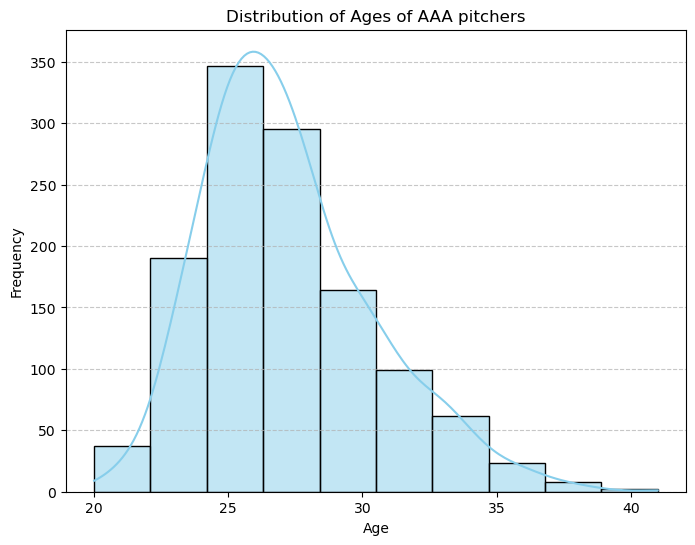

In [57]:
## Distribution of Age for each AAA pitcher in 2023
plt.figure(figsize=(8, 6))
sns.histplot(data=PitchData, x='Age', bins=10, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of AAA pitchers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

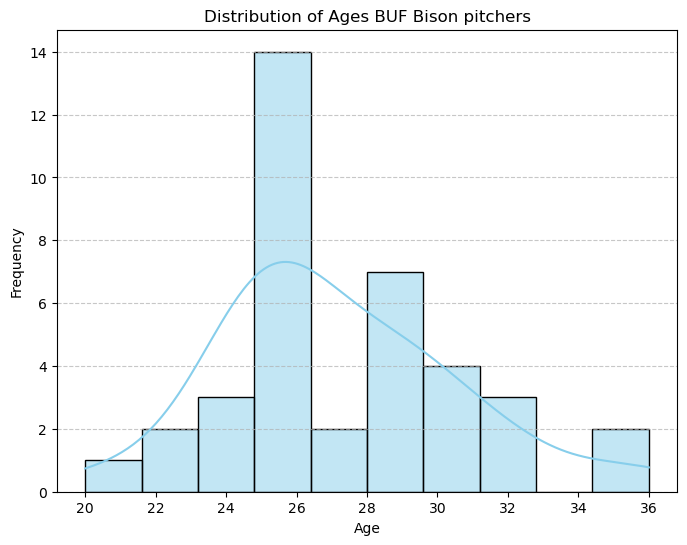

In [51]:
## Compare Distribution of Age for [Select Team] pitchers compared to league average
## As example:
plt.figure(figsize=(8, 6))
sns.histplot(data=BUFBisonP, x='Age', bins=10, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages BUF Bison pitchers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

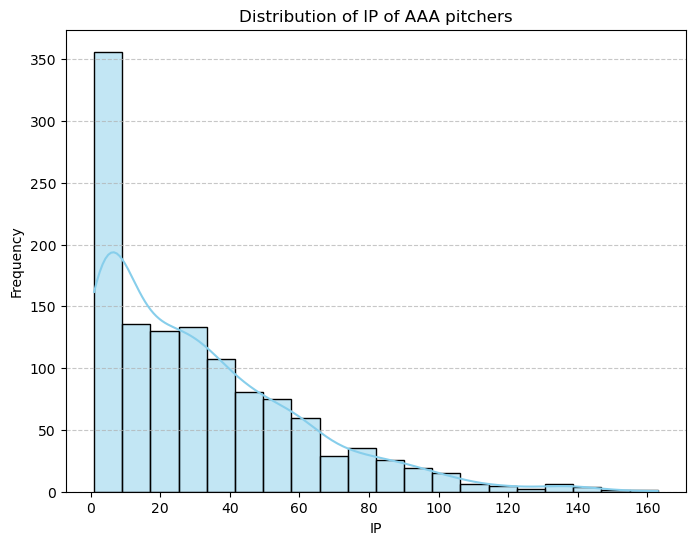

In [61]:
## Distribution of Age for each AAA pitcher in 2023
plt.figure(figsize=(8, 6))
sns.histplot(data=PitchData, x='IP', bins=20, kde=True, color='skyblue')
plt.xlabel('IP')
plt.ylabel('Frequency')
plt.title('Distribution of IP of AAA pitchers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

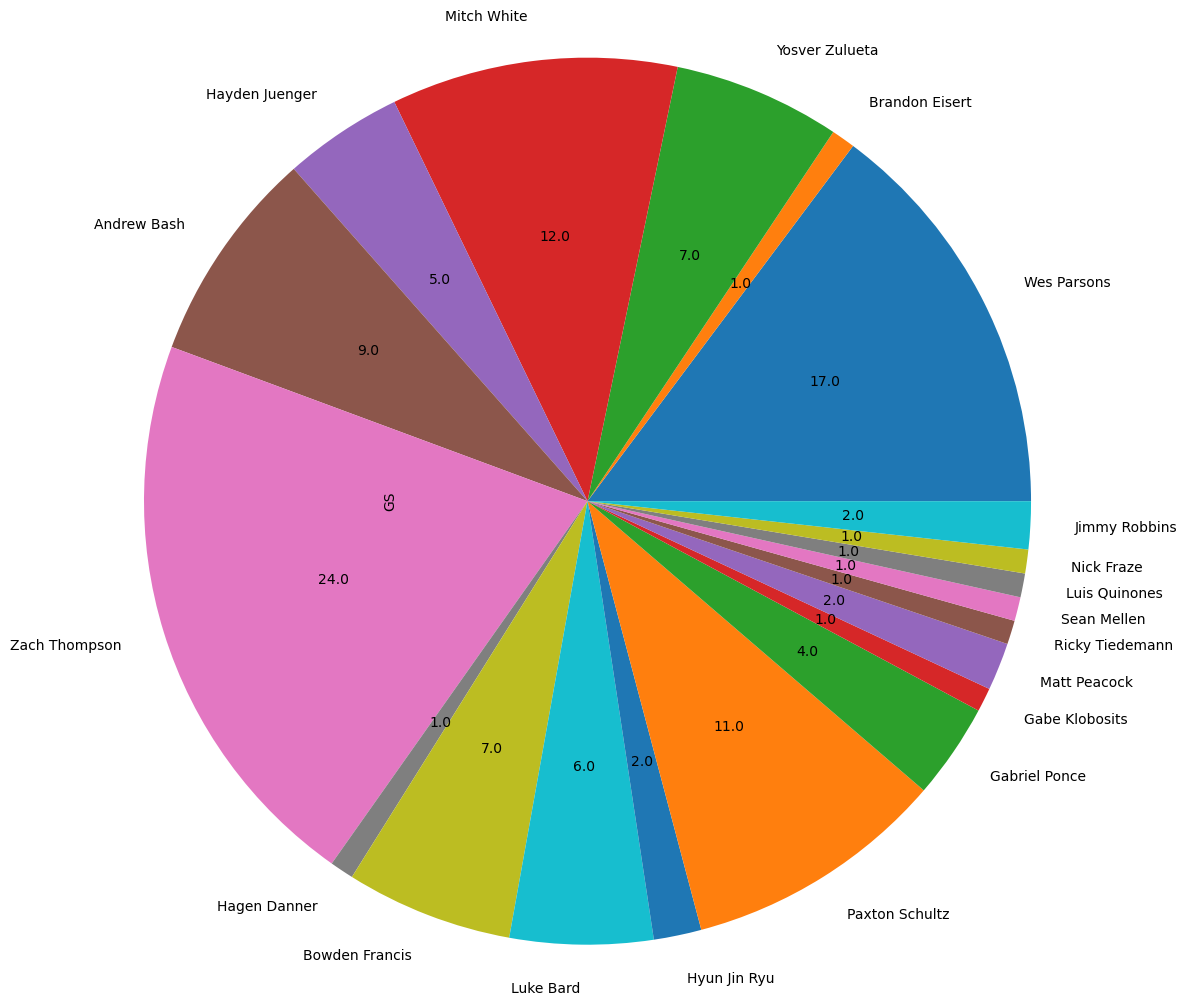

In [62]:
## Visualize Buffalo Bison Starting Pitchers
BUFBisonSP= BUFBisonP.loc[BUFBisonP.GS >= 1]
def show_values(val):
    a = round(val/100.0*BUFBisonSP['GS'].sum(), 0)
    return a
ax = BUFBisonSP.plot.pie(y='GS', labels=BUFBisonSP['Name'], autopct=show_values, radius=3, legend=False)
plt.show()

### 3.B. Hitting

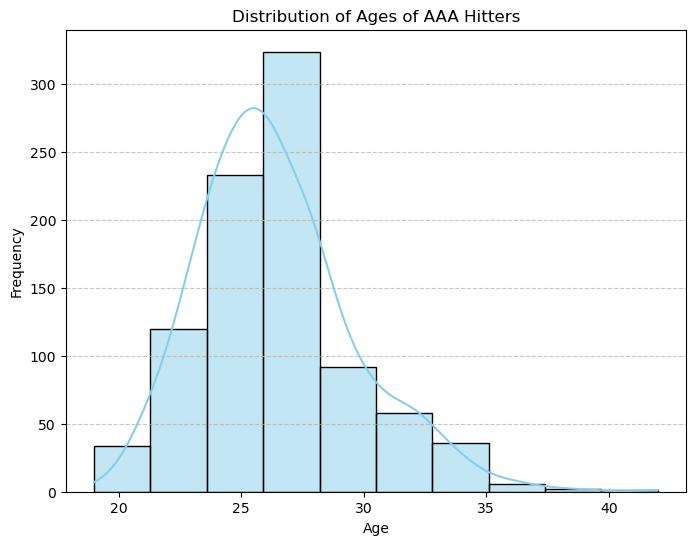

In [58]:
## Distribution of Age for each AAA hitter in 2023
plt.figure(figsize=(8, 6))
sns.histplot(data=HitData, x='Age', bins=10, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of AAA Hitters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

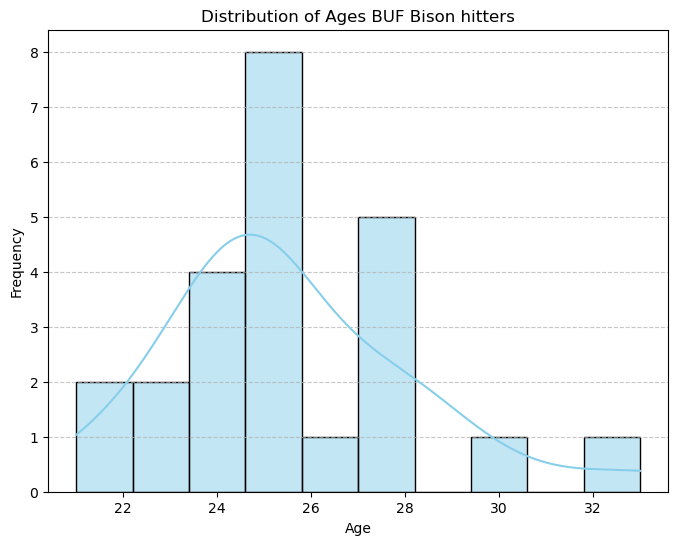

In [59]:
## Compare Distribution of Age for [Select Team] hitters compared to league average
## As example:
plt.figure(figsize=(8, 6))
sns.histplot(data=BUFBisonH, x='Age', bins=10, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages BUF Bison hitters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Scrap

In [64]:
RRExpressP

,bpid,mlbid,Name,Age,Team,WARP,DRA-,DRA,DRA SD,cFIP,...,FA%,FA MPH,SL%,SL MPH,CH%,CH MPH,CU%,CU MPH,KN%,KN MPH
19,108872,667498,Robert Dugger,27,RR,1.9,87.0,5.45,1.01,88.0,...,53.8,91.4,15.0,80.2,15.8,82.5,15.3,74.2,0.0,0.0
26,151257,695445,Chase Lee,24,RR,1.8,61.0,3.82,1.03,62.0,...,56.6,89.0,43.4,81.3,0.0,0.0,0.0,0.0,0.0,0.0
74,110167,656641,Jake Latz,27,RR,1.3,65.0,4.07,1.01,66.0,...,50.6,94.8,21.4,83.9,23.3,85.6,4.7,78.3,0.0,0.0
195,108504,666720,Yerry Rodríguez,25,RR,0.8,69.0,4.34,1.03,78.0,...,66.3,97.2,27.1,84.0,6.5,85.6,0.0,0.0,0.0,0.0
203,112001,681982,Grant Anderson,26,RR,0.8,58.0,3.64,1.19,59.0,...,60.5,92.2,36.0,83.5,3.5,86.1,0.0,0.0,0.0,0.0
372,114186,674003,Cody Bradford,25,RR,0.5,101.0,6.35,1.44,103.0,...,51.9,89.9,24.7,84.3,23.4,81.6,0.0,0.0,0.0,0.0
387,144755,687847,Marc Church,22,RR,0.5,92.0,5.74,1.57,100.0,...,53.5,95.2,46.5,86.6,0.0,0.0,0.0,0.0,0.0,0.0
404,134488,642016,Daniel Robert,28,RR,0.4,85.0,5.32,1.40,94.0,...,54.5,96.1,45.4,83.5,0.1,90.7,0.0,0.0,0.0,0.0
439,102803,642271,Fernery Ozuna,27,RR,0.4,102.0,6.41,1.66,107.0,...,50.2,93.5,4.6,84.7,45.2,86.6,0.0,0.0,0.0,0.0
448,52572,453178,Ian Kennedy,38,RR,0.4,75.0,4.71,1.31,82.0,...,60.5,92.5,7.2,84.6,31.6,84.2,0.7,78.1,0.0,0.0


In [73]:
Pitcher = RRExpressP[RRExpressP['Name'] == 'Yerry Rodríguez']
Pitcher

,bpid,mlbid,Name,Age,Team,WARP,DRA-,DRA,DRA SD,cFIP,...,FA%,FA MPH,SL%,SL MPH,CH%,CH MPH,CU%,CU MPH,KN%,KN MPH
195,108504,666720,Yerry Rodríguez,25,RR,0.8,69.0,4.34,1.03,78.0,...,66.3,97.2,27.1,84.0,6.5,85.6,0.0,0.0,0.0,0.0


In [66]:
TACRainiersH

,bpid,mlbid,Name,Age,Team,WARP,DRC+,DRC+ SD,G,PA,...,BABIP,GB%,LD%,FB%,IFFB%,HR/FB%,IFH%,Pull%,Cent%,Opp%
36,118199,676113,Zach DeLoach,24,TAC,1.9,98,11.0,138,623,...,0.380,34.7,29.2,33.9,2.5,16.4,6.6,40.3,27.8,31.1
51,104996,657247,Brian O'Keefe,29,TAC,1.7,106,12.0,91,403,...,0.262,37.5,20.3,31.6,10.9,23.5,2.4,49.2,27.7,22.7
69,103695,645801,Mike Ford,30,TAC,1.6,138,16.0,49,211,...,0.300,39.2,19.6,29.4,11.9,21.4,3.8,48.3,25.2,26.6
116,107983,669450,Cooper Hummel,28,TAC,1.3,102,10.0,104,455,...,0.348,39.5,27.1,27.5,7.0,9.9,13.7,45.3,26.4,28.3
125,108682,666211,Taylor Trammell,25,TAC,1.3,106,13.0,85,391,...,0.323,36.4,27.7,29.1,6.8,28.1,9.4,39.1,28.6,31.8
136,110796,676595,Jake Scheiner,27,TAC,1.2,112,12.0,124,553,...,0.286,44.1,20.8,29.0,6.9,28.1,12.1,45.0,23.6,31.4
157,106102,664059,Sam Haggerty,29,TAC,1.1,119,14.0,47,222,...,0.361,42.8,33.6,18.4,6.6,17.9,11.7,46.1,25.7,28.3
191,144923,687799,Cade Marlowe,26,TAC,1.0,88,11.0,81,379,...,0.330,35.3,25.2,34.0,5.5,12.3,12.8,47.1,25.6,27.3
315,101640,624523,Riley Unroe,27,TAC,0.6,107,15.0,45,179,...,0.314,38.9,29.6,24.1,4.6,19.2,13.5,50.0,17.6,32.4
350,58809,544369,Didi Gregorius,33,TAC,0.5,101,13.0,25,117,...,0.198,39.3,22.5,28.1,10.1,12.0,5.0,46.1,20.2,33.7


In [72]:
## Example Hitter: Zach DeLoach, Tacoma Rainiers
Hitter = TACRainiersH[TACRainiersH['Name'] == 'Zach DeLoach']
Hitter

,bpid,mlbid,Name,Age,Team,WARP,DRC+,DRC+ SD,G,PA,...,BABIP,GB%,LD%,FB%,IFFB%,HR/FB%,IFH%,Pull%,Cent%,Opp%
36,118199,676113,Zach DeLoach,24,TAC,1.9,98,11.0,138,623,...,0.38,34.7,29.2,33.9,2.5,16.4,6.6,40.3,27.8,31.1
